##  Using the ARIMA Model for forecasting the daily visits in Emergency Department

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller 

C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [39]:
series = pd.read_csv('time series data.csv')
print(series.head(30))

In [41]:
series['DATE'] = pd.to_datetime(series['DATE']) 
series = series.set_index('DATE')
series.head(30)

,No
DATE,
2007-10-09,325
2007-10-10,417
2007-10-11,556
2007-10-12,467
2007-10-13,430
2007-10-14,434
2007-10-15,434
2007-10-16,416
2007-10-17,465


### Visualize Time Series Data

In [43]:
df_No = series['No'] 
df_No.head(30)

DATE
2007-10-09    325
2007-10-10    417
2007-10-11    556
2007-10-12    467
2007-10-13    430
2007-10-14    434
2007-10-15    434
2007-10-16    416
2007-10-17    465
2007-10-18    575
2007-10-19    432
2007-10-20    474
2007-10-21    436
2007-10-22    364
2007-10-23    359
2007-10-24    411
2007-10-25    490
2007-10-26    408
2007-10-27    379
2007-10-28    398
2007-10-29    410
2007-10-30    374
2007-10-31    401
2007-11-01    484
2007-11-02    445
2007-11-03    405
2007-11-04    396
2007-11-05    386
2007-11-06    468
2007-11-07    459
Name: No, dtype: int64

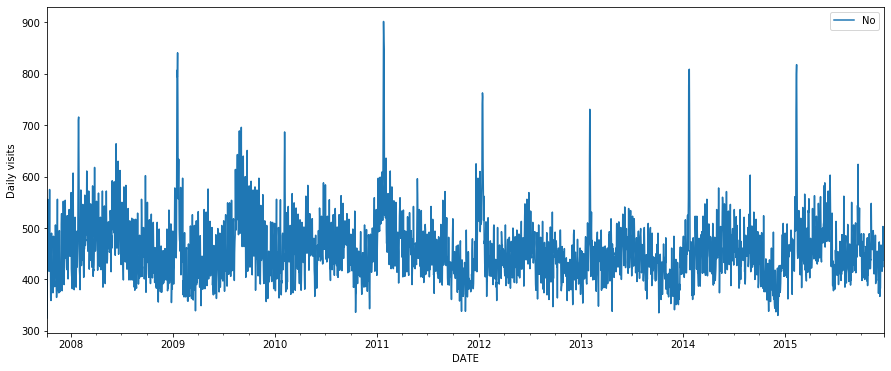

In [44]:
plt.figure(figsize=(15,6)) 
df_No.plot() 
plt.ylabel('Daily visits') 
plt.legend()

In [ ]:
decomp = seasonal_decompose(series)
decomp.plot()
plt.show()

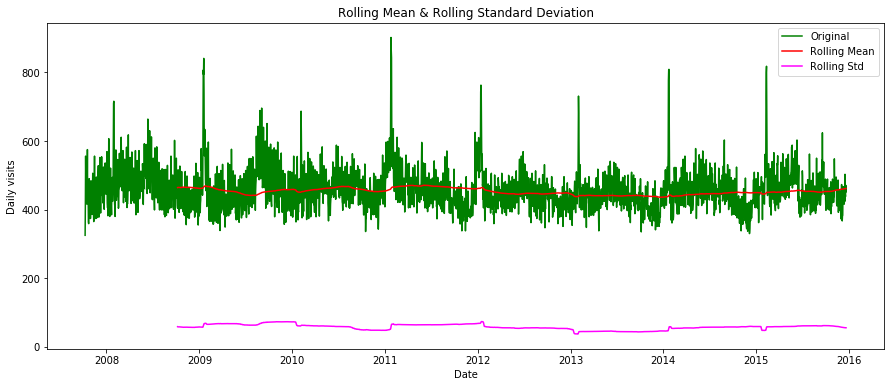

In [45]:
rolling_mean = df_No.rolling(window = 365).mean() 
rolling_std = df_No.rolling(window = 365).std() 
plt.figure(figsize=(15,6)) 
plt.plot(series['No'], color = 'green', label = 'Original') 
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean') 
plt.plot(rolling_std, color = 'magenta', label = 'Rolling Std') 
plt.legend(loc = 'best') 
plt.title('Rolling Mean & Rolling Standard Deviation') 
plt.xlabel('Date') 
plt.ylabel('Daily visits') 
plt.legend()

Augmented Dickey-Fuller Test(ADF Test)

In [46]:
adf_test = adfuller(df_No) 
print('ADF Statistics: {}'.format(adf_test[0])) 
print('p-value: {}'.format(adf_test[1])) 
for key, value in adf_test[4].items(): 
    print('Critical Values Over {}: {}'.format(key, value)) 

ADF Statistics: -7.27460903145954
p-value: 1.5562045233453172e-10
Critical Values Over 1%: -3.432556665038245
Critical Values Over 5%: -2.862514960237111
Critical Values Over 10%: -2.5672889976624265


In [ ]:
# Import the library
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

X = df_No.values 
size = 355 
train, test = X[0:len(X)-size], X[len(X)-size+1:len(X)]

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(train,
                          start_p = 1,
                          start_q = 1,
                          max_p = 3,
                          max_q = 3,
                          m = 12,
                          start_P = 0,
                          seasonal = True,
                          d = None,
                          D = 1,
                          trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)
# To print the summary
stepwise_fit.summary()

In [49]:
history = [x for x in train] 
predictions = list() 
for i in range(len(test)): 
    model = ARIMA(history, order=(2,1,2)) 
    model_fit = model.fit(disp=0) 
    results = model_fit.forecast() 
    pred = results[0] 
    predictions.append(pred) 
    true = test[i] 
    history.append(true) 
    print('predicted= {}, True observations= {}'.format(pred, true))  

error = mean_squared_error(test, predictions) 
print('Test MSE: {}'.format(error)) 

predicted= [440.02225266], True observations= 432
predicted= [437.65154081], True observations= 416
predicted= [424.19539865], True observations= 467
predicted= [457.29578506], True observations= 408
predicted= [412.29957193], True observations= 462
predicted= [452.73036978], True observations= 404
predicted= [410.47182411], True observations= 508
predicted= [483.58145429], True observations= 459
predicted= [441.28926517], True observations= 430
predicted= [427.15964929], True observations= 362
predicted= [390.36019411], True observations= 392
predicted= [420.54535908], True observations= 467
predicted= [466.17313775], True observations= 465
predicted= [451.90848961], True observations= 444
predicted= [434.02113872], True observations= 465
predicted= [449.88137685], True observations= 467
predicted= [450.62353995], True observations= 455
predicted= [444.11561023], True observations= 455
predicted= [447.76274969], True observations= 467
predicted= [458.00239718], True observations= 478


predicted= [463.76074589], True observations= 481
predicted= [510.28027649], True observations= 506
predicted= [519.88154732], True observations= 529
predicted= [526.87181852], True observations= 436
predicted= [459.30294226], True observations= 388
predicted= [436.24720309], True observations= 436
predicted= [473.79518945], True observations= 394
predicted= [437.99448518], True observations= 378
predicted= [425.47718989], True observations= 411
predicted= [443.82580449], True observations= 429
predicted= [445.89708361], True observations= 397
predicted= [415.79290965], True observations= 385
predicted= [406.515268], True observations= 381
predicted= [402.71065119], True observations= 387
predicted= [404.43736578], True observations= 457
predicted= [447.18057901], True observations= 438
predicted= [423.53927518], True observations= 513
predicted= [472.64956209], True observations= 498
predicted= [455.58841053], True observations= 442
predicted= [421.98993314], True observations= 416
pr

KeyboardInterrupt: 

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
X = df_No.values 
size = 355 
train, test = X[0:len(X)-size], X[len(X)-size+1:len(X)]
history = [x for x in train] 
predictions = list() 
for i in range(len(test)): 
    model = SARIMAX(history, order=(1,1,5), seasonal_order =(2,0,1,7)) 
    model_fit = model.fit(disp=0) 
    results = model_fit.forecast() 
    pred = results[0] 
    predictions.append(pred) 
    true = test[i] 
    history.append(true) 
    print('predicted= {}, True observations= {}'.format(pred, true))  

error = mean_squared_error(test, predictions) 
print('Test MSE: {}'.format(error))

C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 480.6434782726911, True observations= 432
predicted= 423.58925199744095, True observations= 416
predicted= 392.97273550408306, True observations= 467


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 443.90006564736046, True observations= 408


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 422.9510623588162, True observations= 462


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 452.091052239427, True observations= 404


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 424.93827208183967, True observations= 508


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 507.22490560302913, True observations= 459


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 448.9470381050577, True observations= 430


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 411.7703878057767, True observations= 362


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 377.22726699720835, True observations= 392
predicted= 395.99570117940345, True observations= 467


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 462.1243108933989, True observations= 465


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 486.21376884421693, True observations= 444


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 480.8005339554647, True observations= 465
predicted= 421.09920041377285, True observations= 467


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 416.84963232027644, True observations= 455


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 446.5667183372914, True observations= 455


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 460.23717383183197, True observations= 467


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 452.7737771527762, True observations= 478
predicted= 465.3596226671209, True observations= 496


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 509.5230591673433, True observations= 472


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 453.52216566695824, True observations= 481


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 434.26203227598984, True observations= 429
predicted= 424.10926426840405, True observations= 371
predicted= 398.84780949670994, True observations= 435


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 437.0914724395675, True observations= 478
predicted= 477.5903654028629, True observations= 471


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 502.3429474441798, True observations= 456


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 442.40057960241705, True observations= 440


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 399.19558830027245, True observations= 468


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 433.9180177765208, True observations= 417


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 440.090661914507, True observations= 416


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 436.75477252381086, True observations= 486


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 469.2440516352866, True observations= 561


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 540.9108101261245, True observations= 530


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 497.2444806804254, True observations= 494


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 448.9726520429377, True observations= 496


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 443.15829684882914, True observations= 727


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 603.2394852016068, True observations= 800


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 702.6857498711681, True observations= 818


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 739.0800677064174, True observations= 692


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 686.3029173665269, True observations= 558


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 546.6351450536448, True observations= 455


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 459.92577071853026, True observations= 441


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 469.1902049188436, True observations= 450


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 484.0974562796216, True observations= 485


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 506.6470939928737, True observations= 497


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 515.1926836447851, True observations= 534


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 549.9303711887372, True observations= 470


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 468.5456388032851, True observations= 505


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 467.05501716406286, True observations= 453


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 464.1915744969357, True observations= 418


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 433.3122219317574, True observations= 409


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 443.5999572560527, True observations= 446


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 468.0147359459241, True observations= 519


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 531.6290288356869, True observations= 483


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 471.35938381626374, True observations= 428


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 413.9096371163188, True observations= 384


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 383.73040121630066, True observations= 421


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 425.77169471788613, True observations= 483


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 489.99789676522573, True observations= 447


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 480.52279785197965, True observations= 540
predicted= 519.1762755657078, True observations= 502


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 457.6575756018088, True observations= 458


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 421.8553166291076, True observations= 436
predicted= 435.64605305614515, True observations= 430


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 440.2756494711889, True observations= 514
predicted= 493.8075957654327, True observations= 440
predicted= 476.1357367254485, True observations= 566


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 536.9384607470407, True observations= 507
predicted= 468.8026932648074, True observations= 418


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 400.8793718786778, True observations= 429


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 421.96881806865906, True observations= 414


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 436.7232292904214, True observations= 408


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 433.50357856895533, True observations= 397


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 447.81029532070806, True observations= 480


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 484.5087920577246, True observations= 500


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 460.17047428643184, True observations= 476


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 448.7435687293909, True observations= 486


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 458.5119571200201, True observations= 414


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 424.8931143078385, True observations= 534


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 490.76581445370357, True observations= 533


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 534.7476332408158, True observations= 530


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 529.7486302265714, True observations= 557


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 491.77359755134233, True observations= 464


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 428.1405182895923, True observations= 432


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 422.43662976922406, True observations= 403


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 438.10933797265966, True observations= 467
predicted= 469.052509783228, True observations= 445
predicted= 475.12765721917685, True observations= 480


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 496.4930055213072, True observations= 462


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 434.7254473929646, True observations= 436


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 410.3836283871694, True observations= 422


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 422.705586105301, True observations= 423


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 446.3362403519007, True observations= 429


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 441.9495509266266, True observations= 453
predicted= 469.55483131938655, True observations= 538


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 524.7916109888166, True observations= 480


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 456.3592023780483, True observations= 458


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 426.18534272132246, True observations= 461


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 436.86948814401745, True observations= 450


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 457.05108573819973, True observations= 440
predicted= 455.3539539591633, True observations= 516


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 515.5956631552478, True observations= 563


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 536.6270423324016, True observations= 491


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 462.590841107815, True observations= 483


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 441.99675764547226, True observations= 461


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 437.9300602799176, True observations= 457


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 462.71658203671893, True observations= 502


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 500.19841732349005, True observations= 436


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 476.28618383648006, True observations= 523


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 498.62081460503566, True observations= 496


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 464.38231078308394, True observations= 444


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 429.65605852440086, True observations= 430


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 428.88978270000183, True observations= 461


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 462.5336074331461, True observations= 435


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 447.041184996683, True observations= 475


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 496.96027855534436, True observations= 548
predicted= 525.9026981809093, True observations= 519


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 474.1770664471657, True observations= 453


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 430.5460213547605, True observations= 474


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 447.8401756573334, True observations= 442


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 452.1550675485307, True observations= 478


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 477.5030645548527, True observations= 505
predicted= 523.7174554093549, True observations= 560


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 530.9316687036935, True observations= 561


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 498.43267005954, True observations= 501


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 461.7702803534812, True observations= 442


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 430.9205251152666, True observations= 434


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 443.9037717257126, True observations= 484
predicted= 481.99992819095434, True observations= 488


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 517.9960618779758, True observations= 488
predicted= 498.3397278286894, True observations= 500
predicted= 453.814245853207, True observations= 471


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 434.8046969540603, True observations= 475


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 459.8078466910617, True observations= 507


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 503.7358708378286, True observations= 511


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 495.74866893814317, True observations= 538


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 527.9095512715784, True observations= 583


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 546.9676480547025, True observations= 492


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 461.30083568227064, True observations= 588


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 507.19362459402146, True observations= 463
predicted= 463.48631523451036, True observations= 491
predicted= 485.22310601781163, True observations= 479


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 480.08887659622167, True observations= 532


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 528.6175685573908, True observations= 549


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 533.150694700162, True observations= 519


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 490.28091521245034, True observations= 474


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 436.4640697835839, True observations= 489


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 459.3084463001196, True observations= 512
predicted= 508.87650606626806, True observations= 493


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 498.87532580732875, True observations= 490
predicted= 509.22315233699476, True observations= 572


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 525.7234465961261, True observations= 528


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 490.6349227377949, True observations= 484


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 458.9835653845751, True observations= 485


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 467.5239484501793, True observations= 474


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 471.8341466677332, True observations= 548


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 523.2254941632664, True observations= 538
predicted= 555.1765370957382, True observations= 603
predicted= 553.8057281949788, True observations= 555
predicted= 497.6728254390492, True observations= 499


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 458.8823181609535, True observations= 508


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 480.6667836497461, True observations= 425
predicted= 460.96919484031304, True observations= 481
predicted= 481.15644262115364, True observations= 506


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 530.7149739784322, True observations= 529
predicted= 518.0762527791438, True observations= 436


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 433.35257548712667, True observations= 388
predicted= 389.5633229183703, True observations= 436


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 425.4643601952829, True observations= 394


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 450.15922440321026, True observations= 378


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 433.2470898281948, True observations= 411


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 458.3002392088593, True observations= 429


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 435.9125285318457, True observations= 397


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 405.8375064382023, True observations= 385


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 404.42742963977224, True observations= 381


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 395.7920672870462, True observations= 387


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 421.1037379912431, True observations= 457
predicted= 467.71414336197586, True observations= 438


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 483.5923440126311, True observations= 513


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 486.74428250239686, True observations= 498


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 459.7659716080528, True observations= 442


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 429.3186614638401, True observations= 416


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 419.4106200507623, True observations= 408


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 437.9991442517359, True observations= 418
predicted= 441.4178690434384, True observations= 431
predicted= 484.12458243842104, True observations= 454


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 463.9914507384035, True observations= 434


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 419.9945805134817, True observations= 390


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 396.635482856221, True observations= 421


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 421.5144246596134, True observations= 426


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 454.35457182868015, True observations= 427


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 448.92528036158177, True observations= 433


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 473.4954388929085, True observations= 474


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 462.73993491734376, True observations= 417


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 412.1776209113311, True observations= 410


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 413.21332685906845, True observations= 416
predicted= 422.6020799607448, True observations= 398


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 431.79034553412964, True observations= 418


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 440.9163991813217, True observations= 410


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 461.4718440657835, True observations= 487


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 468.9751808009737, True observations= 443


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 432.89514337895463, True observations= 486


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 458.1650944103061, True observations= 417


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 422.8269006154952, True observations= 425


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 439.96301704259065, True observations= 448


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 452.98245186892865, True observations= 453


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 493.89865973869905, True observations= 562


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 522.7587142800696, True observations= 492


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 468.8182197236359, True observations= 435


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 418.6899489621366, True observations= 424


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 414.4566401863893, True observations= 385


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 424.5763048711109, True observations= 467


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 472.58794722542785, True observations= 478


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 525.34923697506, True observations= 485
predicted= 472.5416285113662, True observations= 428


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 411.3986371516704, True observations= 393


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 391.54008650870566, True observations= 412


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 415.17685243060123, True observations= 417


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 459.5126113680239, True observations= 420


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 447.52313572547706, True observations= 453


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 485.4430039142807, True observations= 507


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 475.08775885072197, True observations= 438


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 427.94959855949173, True observations= 438


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 428.15886294399286, True observations= 445


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 432.96997523861955, True observations= 396


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 433.2702569898204, True observations= 409


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 435.8807577048497, True observations= 417


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 470.7386496502308, True observations= 469


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 453.3781257320762, True observations= 423


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 424.04849014975684, True observations= 419


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 419.6562914994567, True observations= 389


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 396.1748764078239, True observations= 403
predicted= 430.43912841328523, True observations= 399


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 430.5160095109943, True observations= 455


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 494.21229498168674, True observations= 550


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 504.45197580648744, True observations= 423


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 422.7571758857399, True observations= 458


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 429.10148111825646, True observations= 414


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 410.2077005575348, True observations= 415


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 439.8158362355168, True observations= 441


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 448.10978401528655, True observations= 428


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 480.440033122912, True observations= 506


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 462.9344195858458, True observations= 471


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 443.78276881522413, True observations= 440


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 422.87066352301207, True observations= 429


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 417.8629141310709, True observations= 434


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 447.21971784471776, True observations= 417


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 438.4639740156154, True observations= 481


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 508.0911149573919, True observations= 510


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 478.58147562219426, True observations= 413


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 414.735011718348, True observations= 435


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 415.5797164890616, True observations= 452


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 432.79918172932935, True observations= 444


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 456.88529309153864, True observations= 466


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 477.6147424436125, True observations= 444


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 487.6742448249389, True observations= 544


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 484.78630884255256, True observations= 508


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 474.82803673111044, True observations= 624


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 539.8278316458012, True observations= 513


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 501.6563579338865, True observations= 509


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 507.702175925198, True observations= 467


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 482.1914500081224, True observations= 500


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 542.7082231054824, True observations= 539


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 511.39273778953236, True observations= 461


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 465.8327778721711, True observations= 452


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 439.8934751561804, True observations= 445


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 442.54050546003367, True observations= 457


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 470.7823561578297, True observations= 482


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 488.3838535784885, True observations= 455


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 513.6741024135966, True observations= 489


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 462.71836904457604, True observations= 416


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 424.20647473001475, True observations= 398


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 404.954627901831, True observations= 418


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 427.3177850196691, True observations= 418


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 447.69134798879696, True observations= 457


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 464.19451950496074, True observations= 474


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 511.2794970554272, True observations= 463


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 436.0800752310074, True observations= 489


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 456.82662452714277, True observations= 403


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 413.84295079819987, True observations= 404


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 411.4827919861626, True observations= 451


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 461.31914797433916, True observations= 400


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 435.916782491069, True observations= 445
predicted= 488.72762843045797, True observations= 449


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 437.351576862317, True observations= 464


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 440.06398407353834, True observations= 431


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 430.00562863367935, True observations= 439


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 440.47053884362174, True observations= 419
predicted= 433.92394644842307, True observations= 397


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 425.13140855946256, True observations= 461


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 494.090712686412, True observations= 481
predicted= 464.37153126814815, True observations= 388


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 406.73722439269795, True observations= 420


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 409.0511192166765, True observations= 409


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 415.3106187119051, True observations= 466


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 466.99900562294584, True observations= 420


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 457.6995961472916, True observations= 461


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 487.68761691812165, True observations= 489


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 446.1868291692646, True observations= 463


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 448.5849407643458, True observations= 445


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 440.11374609502445, True observations= 459


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 450.1380963392603, True observations= 421


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 433.63076082325637, True observations= 439


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 452.14987490052386, True observations= 438


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 487.13922171353835, True observations= 548


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 490.05068036064836, True observations= 496


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 477.33576924681915, True observations= 477


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 454.3957505387792, True observations= 493


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 461.80845754672225, True observations= 458


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 454.48166093790326, True observations= 461


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 470.45996263169127, True observations= 465


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 507.9020387029844, True observations= 495


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 461.60700286726467, True observations= 488


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 462.44474004480315, True observations= 417


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 428.88112158541225, True observations= 411


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 414.8991221408284, True observations= 411


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 427.40042210245383, True observations= 441


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 457.96305201610113, True observations= 433


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 492.2521949310931, True observations= 428


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 423.7148746909295, True observations= 486


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 445.56842126786614, True observations= 392


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 410.32562344117537, True observations= 415


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 422.84990880713053, True observations= 401


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 424.51666737768767, True observations= 398


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 423.59923192761283, True observations= 443


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 484.4179204157973, True observations= 455


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 451.31119729341424, True observations= 432


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 419.11554461584717, True observations= 447
predicted= 431.75703746878867, True observations= 453


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 445.2687323216108, True observations= 422


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 437.4183145851411, True observations= 373


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 413.89150273614484, True observations= 400


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 445.6778160779673, True observations= 472


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 452.3493118201502, True observations= 473


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 463.15870096473645, True observations= 415


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 428.9278083821205, True observations= 367


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 379.10921203317673, True observations= 382


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 391.49764837709245, True observations= 383


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 423.3001738183785, True observations= 448


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 500.27886121942987, True observations= 467
predicted= 458.44606084290933, True observations= 454


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 426.80783642229517, True observations= 418


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 409.12341573166333, True observations= 436


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 428.7819920130834, True observations= 416


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 432.33015283992347, True observations= 440


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 456.3217921181893, True observations= 424


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 472.5950117691559, True observations= 503
predicted= 465.74730900173563, True observations= 444


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 433.86698608185003, True observations= 438


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 430.6012711535858, True observations= 471


C:\Users\Chin Chieh Wu\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted= 450.8259547427063, True observations= 452
Test MSE: 1696.5287326555447


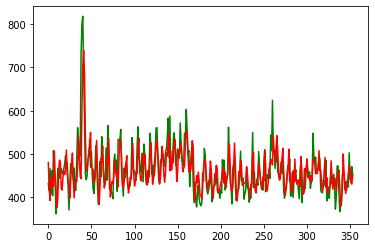

In [52]:
plt.plot(test, color='green') 
plt.plot(predictions, color='red') 
plt.show()

In [53]:
# calculate for Testing set
mae = np.mean(np.abs(predictions - test))
mae

29.942538098928882

In [54]:
mape = np.mean(np.abs(predictions - test)/np.abs(test))
mape

0.0633276124627182